## StackingRegressor

StackingRegressor to zaawansowana technika uczenia maszynowego, która należy do metod ensemble i polega na łączeniu kilku modeli bazowych w jeden model metaregresji. Celem jest poprawienie przewidywań poprzez wykorzystanie kombinacji przewidywań różnych modeli bazowych. Technika ta może pomóc w poprawie wydajności modeli i ich zdolności do generalizacji.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
dane = pd.read_csv('../DataIn/004_mieszkania.csv')
X = dane.iloc[:, :1].values # kolumna pierwasza 
y = dane.iloc[:, -1].values # ostatnia kolumna

In [3]:
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(max_depth=5)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

In [4]:
meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X, y)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor(max_depth=5)),
                              ('rf', RandomForestRegressor(random_state=42))],
                  final_estimator=LinearRegression())

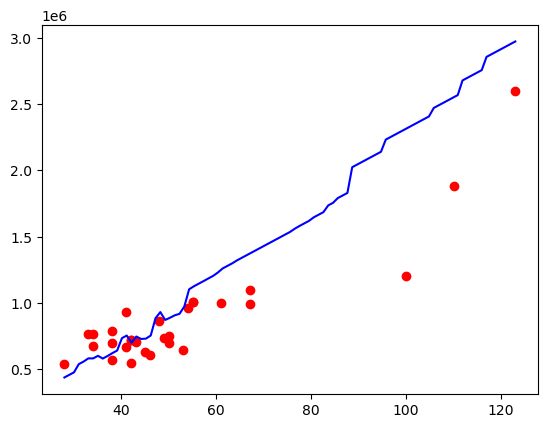

In [5]:
# Wizualizacja polega na stworzeniu tablicy X-ów na tyle gęstych żeby było widać dokładny przebieg krzywej modelu, (ilość punktów X = max(X)-min(X))
X_in = np.linspace(np.min(X), np.max(X), (np.max(X)-np.min(X))) # wygenerowanie X wejściowych w zakresie danych wejściowych między min(X) - max(X)
X_in = X_in.reshape(-1, 1) # konwersja do tablicy dwuwymiarowej

prognoza = stacking_model.predict(X_in) 

plt.scatter(X, y, color='red') 
plt.plot(X_in, prognoza, color='blue') 
plt.show()